In [237]:
import pybithumb
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Back testing purpose
- 각 코인별 시간별로 가격 데이터 시각화
- 코인 시간별 상관관계 확인

# Load Dataset

In [270]:
df = pybithumb.get_ohlcv('XMR', interval='hour').astype(int)
df['datetime'] = df.index
print(df.shape)
df.head(2)

(4307, 6)


,open,high,low,close,volume,datetime
2019-01-27 17:00:00,50700,50700,50100,50550,280773,2019-01-27 17:00:00
2019-01-27 18:00:00,50400,50750,50250,50250,21,2019-01-27 18:00:00


# Preproseccing

### parse datetime

In [271]:
# 년도, 월, 일, 시간으로 변환
df["1year"] = df["datetime"].dt.year
df["2month"] = df["datetime"].dt.month
df["3day"] = df["datetime"].dt.day
df["4hour"] = df["datetime"].dt.hour
df.head(2)

,open,high,low,close,volume,datetime,1year,2month,3day,4hour
2019-01-27 17:00:00,50700,50700,50100,50550,280773,2019-01-27 17:00:00,2019,1,27,17
2019-01-27 18:00:00,50400,50750,50250,50250,21,2019-01-27 18:00:00,2019,1,27,18


In [272]:
# mon ~ sun 변환
df["dayofweek"] = df["datetime"].dt.dayofweek
df.loc[df["dayofweek"] == 0, "5day"] = "mon"
df.loc[df["dayofweek"] == 1, "5day"] = "tue"
df.loc[df["dayofweek"] == 2, "5day"] = "wed"
df.loc[df["dayofweek"] == 3, "5day"] = "thu"
df.loc[df["dayofweek"] == 4, "5day"] = "fri"
df.loc[df["dayofweek"] == 5, "5day"] = "sat"
df.loc[df["dayofweek"] == 6, "5day"] = "sun"
df.drop(['dayofweek'], axis=1, inplace=True)
df.head(2)

,open,high,low,close,volume,datetime,1year,2month,3day,4hour,5day
2019-01-27 17:00:00,50700,50700,50100,50550,280773,2019-01-27 17:00:00,2019,1,27,17,sun
2019-01-27 18:00:00,50400,50750,50250,50250,21,2019-01-27 18:00:00,2019,1,27,18,sun


In [273]:
df['ex1'] = df['5day'].astype(str) + '-' + df['4hour'].astype(str)
df['log-close'] = np.log(df["close"]+1)
df.head()

,open,high,low,close,volume,datetime,1year,2month,3day,4hour,5day,ex1,log-close
2019-01-27 17:00:00,50700,50700,50100,50550,280773,2019-01-27 17:00:00,2019,1,27,17,sun,sun-17,10.830738
2019-01-27 18:00:00,50400,50750,50250,50250,21,2019-01-27 18:00:00,2019,1,27,18,sun,sun-18,10.824786
2019-01-27 19:00:00,50300,50700,50300,50300,73,2019-01-27 19:00:00,2019,1,27,19,sun,sun-19,10.825780
2019-01-27 20:00:00,50300,50750,50200,50450,78,2019-01-27 20:00:00,2019,1,27,20,sun,sun-20,10.828758
2019-01-27 21:00:00,50750,50750,50200,50200,14,2019-01-27 21:00:00,2019,1,27,21,sun,sun-21,10.823790


# Explore

In [274]:
condition = (df['2month'] == 7) & (df['3day'] == 6) #월
day_df_1 = df[condition]

condition = (df['2month'] == 7) & (df['3day'] == 13)
day_df_2 = df[condition]

condition = (df['2month'] == 7) & (df['3day'] == 20)
day_df_3 = df[condition]

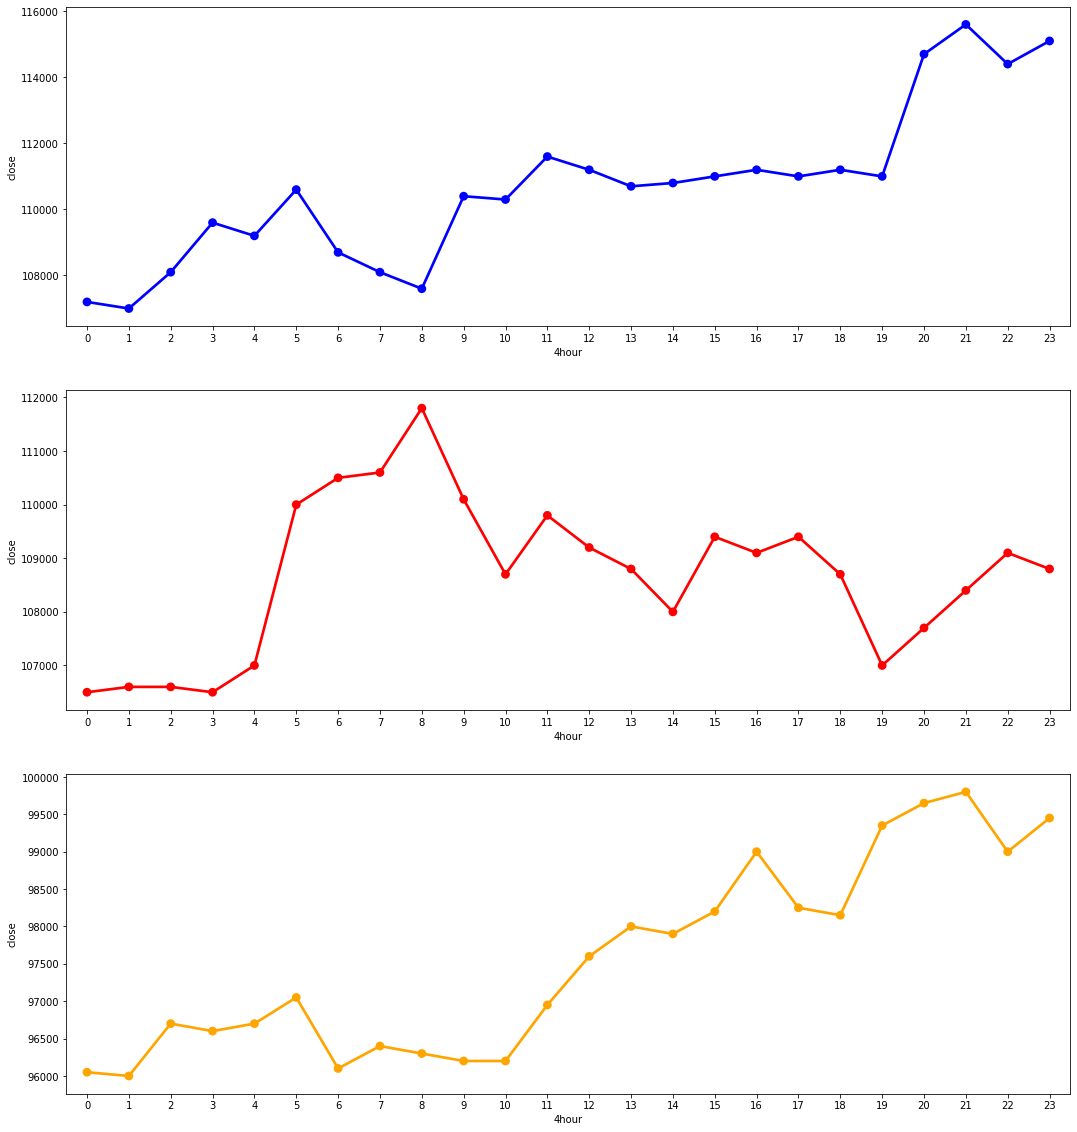

In [275]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 20)

sns.pointplot(data=day_df_1, x="4hour", y="close", color='blue', ax=ax1)
sns.pointplot(data=day_df_2, x="4hour", y="close", color='red', ax=ax2)
sns.pointplot(data=day_df_3, x="4hour", y="close", color='orange', ax=ax3)

# sns.pointplot(data=day_df_21, x="4hour", y="close", color='blue', ax=ax2)
# sns.pointplot(data=day_df_22, x="4hour", y="close", color='red', ax=ax2)

# sns.pointplot(data=day_df_31, x="4hour", y="close", color='blue', ax=ax3)
# sns.pointplot(data=day_df_32, x="4hour", y="close", color='red', ax=ax3)

In [276]:
condition = (df['2month'] == 7) & (df['3day'] == 7) #월
day_df_5 = df[condition]

condition = (df['2month'] == 7) & (df['3day'] == 14)
day_df_6 = df[condition]

condition = (df['2month'] == 7) & (df['3day'] == 21)
day_df_7 = df[condition]

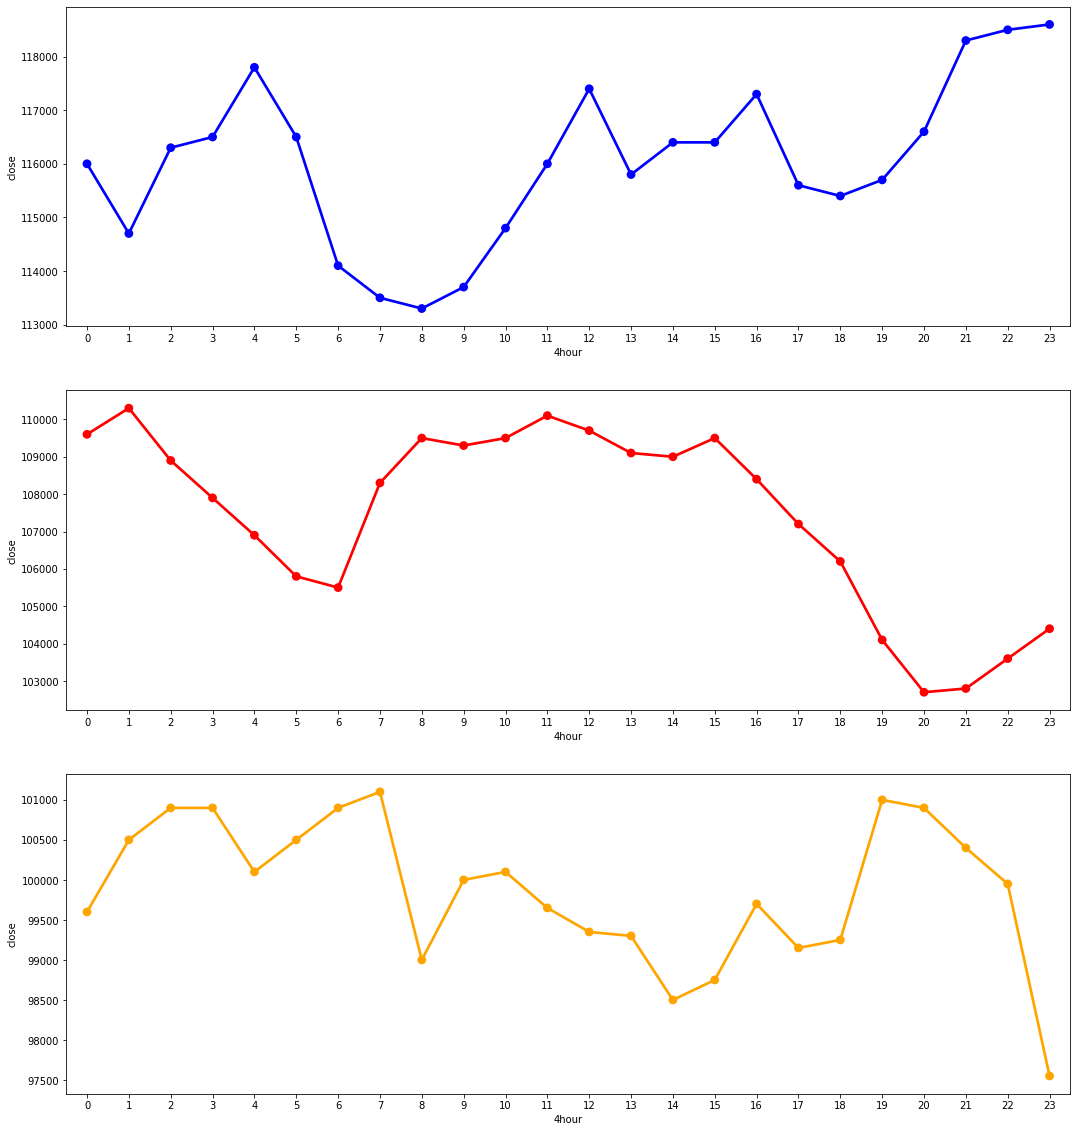

In [277]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 20)

sns.pointplot(data=day_df_5, x="4hour", y="close", color='blue', ax=ax1)
sns.pointplot(data=day_df_6, x="4hour", y="close", color='red', ax=ax2)
sns.pointplot(data=day_df_7, x="4hour", y="close", color='orange', ax=ax3)

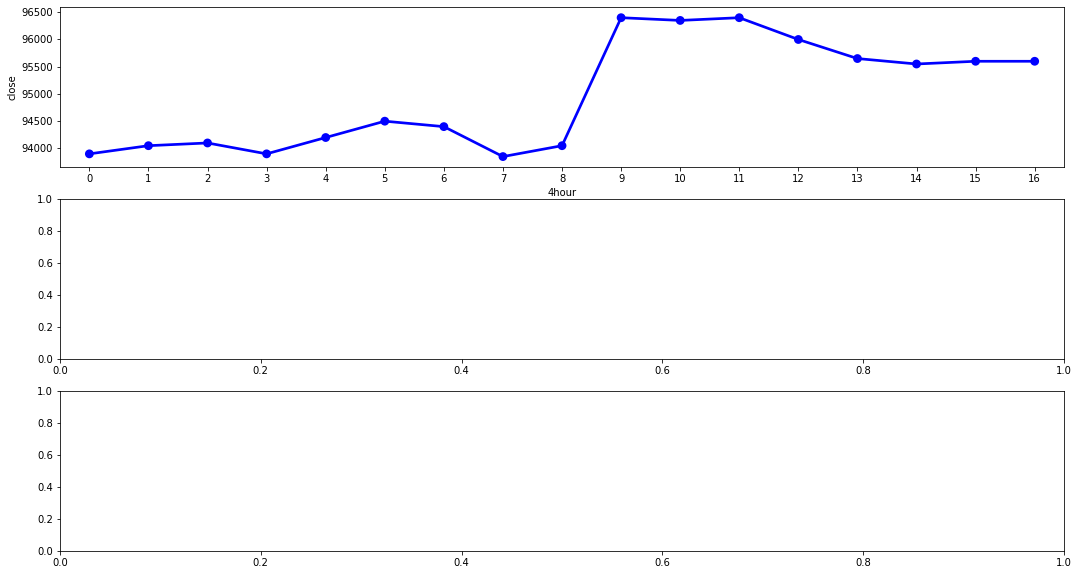

In [278]:
condition = (df['2month'] == 7) & (df['3day'] == 27)
day_df_10 = df[condition]
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 10)
sns.pointplot(data=day_df_10, x="4hour", y="close", color='blue', ax=ax1)